In [29]:
import pandas as pd

df = pd.read_csv('fc24_dataframe.csv')
df.head()

,card_id,name,rating,skill_moves,weak_foot,pace_m,acceleration,sprint_speed,shooting_m,att_position,...,accelerate,total_ingame_stats,card_page_url,nation,league,club,intl_rep,date,price,positions
0,1,Alex Scott,88,3,4,89,90.0,89.0,73,72.0,...,Controlled Explosive,2361,https://www.futbin.com/24/player/1/alex-scott,England,Barclays WSL,HERO,3.0,2023-11-26,0,"['RB', 'RWB']"
1,1,Alex Scott,88,3,4,89,90.0,89.0,73,72.0,...,Controlled Explosive,2361,https://www.futbin.com/24/player/1/alex-scott,England,Barclays WSL,HERO,3.0,2023-11-27,0,"['RB', 'RWB']"
2,1,Alex Scott,88,3,4,89,90.0,89.0,73,72.0,...,Controlled Explosive,2361,https://www.futbin.com/24/player/1/alex-scott,England,Barclays WSL,HERO,3.0,2023-11-28,0,"['RB', 'RWB']"
3,1,Alex Scott,88,3,4,89,90.0,89.0,73,72.0,...,Controlled Explosive,2361,https://www.futbin.com/24/player/1/alex-scott,England,Barclays WSL,HERO,3.0,2023-11-29,0,"['RB', 'RWB']"
4,1,Alex Scott,88,3,4,89,90.0,89.0,73,72.0,...,Controlled Explosive,2361,https://www.futbin.com/24/player/1/alex-scott,England,Barclays WSL,HERO,3.0,2023-11-30,0,"['RB', 'RWB']"


In [30]:
df.columns

Index(['card_id', 'name', 'rating', 'skill_moves', 'weak_foot', 'pace_m',
       'acceleration', 'sprint_speed', 'shooting_m', 'att_position',
       'finishing', 'shot_power', 'long_shots', 'volleys', 'penalties',
       'passing_m', 'vision', 'crossing', 'fk_accuracy', 'short_pass',
       'long_pass', 'curve', 'dribbling_m', 'agility', 'balance', 'reactions',
       'ball_control', 'dribbling', 'composure', 'defending_m',
       'interceptions', 'heading_acc', 'def_aware', 'stand_tackle',
       'slide_tackle', 'physical_m', 'jumping', 'stamina', 'strength',
       'aggression', 'playstyles', 'height', 'weight', 'body_type',
       'accelerate', 'total_ingame_stats', 'card_page_url', 'nation', 'league',
       'club', 'intl_rep', 'date', 'price', 'positions'],
      dtype='object')

In [31]:
# Define attacker positions
attacker_positions = ['ST', 'LW', 'RW', 'CF']

# Filter dataset for attackers
attackers = df[df['positions'].apply(lambda pos_list: any(pos in attacker_positions for pos in eval(pos_list)))]

In [72]:
attackers.columns

Index(['card_id', 'rating', 'skill_moves', 'weak_foot', 'pace_m', 'shooting_m',
       'passing_m', 'dribbling_m', 'defending_m', 'physical_m',
       ...
       'club_Valencia CF', 'club_VfB Stuttgart', 'club_VfL Bochum',
       'club_VfL Wolfsburg', 'club_Villarreal CF', 'club_Washington Spirit',
       'club_West Ham', 'club_Wolves', 'club_sc Heerenveen',
       'club_Çaykur Rizespor'],
      dtype='object', length=392)

In [33]:
attackers = attackers.drop('name', axis=1)
attackers = attackers.drop('acceleration', axis=1)
attackers = attackers.drop('sprint_speed', axis=1)
attackers = attackers.drop('att_position', axis=1)
attackers = attackers.drop('finishing', axis=1)
attackers = attackers.drop('shot_power', axis=1)
attackers = attackers.drop('long_shots', axis=1)
attackers = attackers.drop('volleys', axis=1)
attackers = attackers.drop('penalties', axis=1)
attackers = attackers.drop('vision', axis=1)
attackers = attackers.drop('crossing', axis=1)
attackers = attackers.drop('fk_accuracy', axis=1)
attackers = attackers.drop('short_pass', axis=1)
attackers = attackers.drop('long_pass', axis=1)
attackers = attackers.drop('curve', axis=1)
attackers = attackers.drop('agility', axis=1)
attackers = attackers.drop('balance', axis=1)
attackers = attackers.drop('reactions', axis=1)
attackers = attackers.drop('ball_control', axis=1)
attackers = attackers.drop('dribbling', axis=1)
attackers = attackers.drop('composure', axis=1)
attackers = attackers.drop('interceptions', axis=1)
attackers = attackers.drop('heading_acc', axis=1)
attackers = attackers.drop('def_aware', axis=1)
attackers = attackers.drop('stand_tackle', axis=1)
attackers = attackers.drop('slide_tackle', axis=1)
attackers = attackers.drop('jumping', axis=1)
attackers = attackers.drop('stamina', axis=1)
attackers = attackers.drop('strength', axis=1)
attackers = attackers.drop('aggression', axis=1)
attackers = attackers.drop('body_type', axis=1)
attackers = attackers.drop('accelerate', axis=1)
attackers = attackers.drop('card_page_url', axis=1)
attackers = attackers.drop('positions', axis=1)

In [34]:
# Full list of playstyle columns
playstyle_columns = [
    'power_shot', 'dead_ball', 'chip_shot', 'finesse_shot', 'power_header',
    'pinged_pass', 'incisive_pass', 'long_ball_pass', 'tiki_taka', 'whipped_pass',
    'first_touch', 'flair', 'press_proven', 'rapid', 'technical', 'trickster',
    'block', 'bruiser', 'intercept', 'jockey', 'slide_tackle', 'anticipate',
    'acrobatic', 'aerial', 'trivela', 'relentless', 'quick_step', 'long_throw',
    # Discarding the last 6 (no need to name these since they are unnecessary)
]

# Define attacker-relevant playstyles
attacker_playstyle_columns = [
    'power_shot', 'dead_ball', 'finesse_shot', 'rapid', 'technical',
    'trickster', 'trivela', 'aerial', 'quick_step', 'whipped_pass'
]

# Expand the 'playstyles' column into individual binary columns
# Assuming 'playstyles' contains a string of binary digits corresponding to all playstyles
playstyles_split = attackers['playstyles'].apply(lambda x: list(map(int, x[:len(playstyle_columns)])))

# Create a DataFrame for all playstyles
playstyles_df = pd.DataFrame(playstyles_split.tolist(), columns=playstyle_columns)

# Filter only attacker-relevant playstyles
playstyles_df = playstyles_df[attacker_playstyle_columns]

# Reset indices for both DataFrames
playstyles_df = playstyles_df.reset_index(drop=True)
attackers = attackers.reset_index(drop=True)

# Concatenate attacker-relevant playstyles with the attackers DataFrame
attackers = pd.concat([attackers, playstyles_df], axis=1)

# Drop the original 'playstyles' column if no longer needed
attackers = attackers.drop(columns=['playstyles'])


In [35]:
# Remove rows with price = 0
attackers = attackers[attackers['price'] > 0].reset_index(drop=True)

# Check the remaining rows
print(f"Number of rows after removing 0 price: {len(attackers)}")

Number of rows after removing 0 price: 538116


In [36]:
# Ensure 'date' column is in datetime format
attackers['date'] = pd.to_datetime(attackers['date'])

# Get start and end dates of the game cycle
fc24_start_date = attackers['date'].min()
fc24_end_date = attackers['date'].max()

# Compute days_since_start and days_until_end based on FC24 game cycle
attackers['days_since_start'] = (attackers['date'] - fc24_start_date).dt.days
attackers['days_until_end'] = (fc24_end_date - attackers['date']).dt.days

# Get the first release date (earliest date) for each card_id
card_release_dates = attackers.groupby('card_id')['date'].min().rename('release_date')

# Merge release dates back into the DataFrame
attackers = attackers.merge(card_release_dates, on='card_id', how='left')

# Compute days_since_release for each card
attackers['days_since_release'] = (attackers['date'] - attackers['release_date']).dt.days

# Drop the 'release_date' column if it's no longer needed
attackers = attackers.drop(columns=['release_date'])


In [37]:
# Check the resulting DataFrame
print(attackers[['card_id', 'date', 'days_since_start', 'days_until_end', 'days_since_release']].head())

   card_id       date  days_since_start  days_until_end  days_since_release
0        4 2023-12-15                86             272                   0
1        4 2023-12-16                87             271                   1
2        4 2023-12-17                88             270                   2
3        4 2023-12-18                89             269                   3
4        4 2023-12-19                90             268                   4


In [38]:
# Step 2: Sort and Prepare Data
attackers['date'] = pd.to_datetime(attackers['date'])  # Ensure date is datetime
attackers = attackers.sort_values(['card_id', 'date']).reset_index(drop=True)  # Sort by card_id and date

In [39]:
# Step 3: Add Contextual Features
# Game start and end dates
fc24_start_date = attackers['date'].min()
fc24_end_date = attackers['date'].max()

# Add contextual features
attackers['days_since_start'] = (attackers['date'] - fc24_start_date).dt.days
attackers['days_until_end'] = (fc24_end_date - attackers['date']).dt.days

# Calculate release date for each card and time since release
card_release_dates = attackers.groupby('card_id')['date'].min().rename('release_date')
attackers = attackers.merge(card_release_dates, on='card_id', how='left')
attackers['days_since_release'] = (attackers['date'] - attackers['release_date']).dt.days

# Add a flag for new cards
attackers['is_new'] = attackers['days_since_release'].apply(lambda x: 1 if x < 7 else 0)

In [40]:
print(attackers[['card_id', 'date', 'days_since_start', 'days_until_end', 'days_since_release', 'is_new']].head())

   card_id       date  days_since_start  days_until_end  days_since_release  \
0        4 2023-12-15                86             272                   0   
1        4 2023-12-16                87             271                   1   
2        4 2023-12-17                88             270                   2   
3        4 2023-12-18                89             269                   3   
4        4 2023-12-19                90             268                   4   

   is_new  
0       1  
1       1  
2       1  
3       1  
4       1  


In [41]:
# Step 4: Add Rolling Averages and Lag Features
# Rolling average for the last 7 days
attackers['rolling_avg_price_7d'] = attackers.groupby('card_id')['price'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

# Prices for the last 7 days
for i in range(1, 8):
    attackers[f'price_day_{i}'] = attackers.groupby('card_id')['price'].shift(i)

# Price changes for the last 7 days
for i in range(1, 8):
    attackers[f'price_change_day_{i}'] = attackers[f'price_day_{i}'] - attackers[f'price_day_{i + 1}'] if i < 7 else 0

In [42]:
print(attackers[['card_id', 'date', 'rolling_avg_price_7d', 'price_day_1', 'price_change_day_1']].head(10))

   card_id       date  rolling_avg_price_7d  price_day_1  price_change_day_1
0        4 2023-12-15         812743.000000          NaN                 NaN
1        4 2023-12-16         687070.000000     812743.0                 NaN
2        4 2023-12-17         617769.333333     561397.0           -251346.0
3        4 2023-12-18         580387.750000     479168.0            -82229.0
4        4 2023-12-19         548350.600000     468243.0            -10925.0
5        4 2023-12-20         528713.500000     420202.0            -48041.0
6        4 2023-12-21         517372.000000     430528.0             10326.0
7        4 2023-12-22         470541.714286     449323.0             18795.0
8        4 2023-12-23         456505.285714     484931.0             35608.0
9        4 2023-12-24         449751.428571     463142.0            -21789.0


In [43]:
# Step 5: Handle Missing Values
# Fill missing values in lag features with 0
lag_features = [f'price_day_{i}' for i in range(1, 8)] + [f'price_change_day_{i}' for i in range(1, 8)]
attackers[lag_features] = attackers[lag_features].fillna(0)

# Adjust rolling average for cards with <7 days of data
attackers['rolling_avg_price_7d'] = attackers.groupby('card_id')['price'].transform(
    lambda x: x.rolling(window=min(7, len(x))).mean()
)

In [44]:
# Step 6: Add Target Variable (Price 7 Days Ahead)
# Add a column for the price 7 days into the future
attackers['price_7d'] = attackers.groupby('card_id')['price'].shift(-7)

# Drop rows where the target variable is NaN
attackers = attackers.dropna(subset=['price_7d'])

In [45]:
print(attackers[['card_id', 'date', 'price', 'price_7d']].head(20))

    card_id       date   price  price_7d
0         4 2023-12-15  812743  484931.0
1         4 2023-12-16  561397  463142.0
2         4 2023-12-17  479168  431891.0
3         4 2023-12-18  468243  423787.0
4         4 2023-12-19  420202  422571.0
5         4 2023-12-20  430528  432049.0
6         4 2023-12-21  449323  444783.0
7         4 2023-12-22  484931  441369.0
8         4 2023-12-23  463142  461792.0
9         4 2023-12-24  431891  463616.0
10        4 2023-12-25  423787  463927.0
11        4 2023-12-26  422571  496701.0
12        4 2023-12-27  432049  496470.0
13        4 2023-12-28  444783  503252.0
14        4 2023-12-29  441369  532427.0
15        4 2023-12-30  461792  507475.0
16        4 2023-12-31  463616  479525.0
17        4 2024-01-01  463927  458861.0
18        4 2024-01-02  496701  460421.0
19        4 2024-01-03  496470  478513.0


In [47]:
from sklearn.preprocessing import StandardScaler

# Define continuous features
continuous_features = [
                          'rating', 'skill_moves', 'weak_foot', 'pace_m', 'shooting_m', 'passing_m',
                          'dribbling_m', 'defending_m', 'physical_m', 'height', 'weight',
                          'total_ingame_stats', 'days_since_start', 'days_until_end',
                          'days_since_release', 'rolling_avg_price_7d'
                      ] + [f'price_day_{i}' for i in range(1, 8)] + [f'price_change_day_{i}' for i in range(1, 8)]

# Normalize continuous features
scaler = StandardScaler()
attackers[continuous_features] = scaler.fit_transform(attackers[continuous_features])

In [50]:
# Verify normalization
print(attackers[continuous_features].head(40))

      rating  skill_moves  weak_foot    pace_m  shooting_m  passing_m  \
0   1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
1   1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
2   1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
3   1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
4   1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
5   1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
6   1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
7   1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
8   1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
9   1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
10  1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
11  1.199982     0.288997   0.352964  0.621112    1.237824  -0.682821   
12  1.199982     0.288997   0.352964  0.621112    1

In [51]:
# One-hot encode 'nation', 'league', and 'club'
attackers = pd.get_dummies(attackers, columns=['nation', 'league', 'club'], drop_first=True)

In [53]:
# Verify the columns after one-hot encoding
print(len(attackers.columns))

392


In [59]:
# Define predictor features (excluding non-predictive columns)
predictor_features = continuous_features + [col for col in attackers.columns if col.startswith(('nation_', 'league_', 'club_'))]

# Define the target variable
target = 'price_7d'

# Verify the feature list
print(f"Predictor features: {predictor_features}")
print(f"Target variable: {target}")

Predictor features: ['rating', 'skill_moves', 'weak_foot', 'pace_m', 'shooting_m', 'passing_m', 'dribbling_m', 'defending_m', 'physical_m', 'height', 'weight', 'total_ingame_stats', 'days_since_start', 'days_until_end', 'days_since_release', 'rolling_avg_price_7d', 'price_day_1', 'price_day_2', 'price_day_3', 'price_day_4', 'price_day_5', 'price_day_6', 'price_day_7', 'price_change_day_1', 'price_change_day_2', 'price_change_day_3', 'price_change_day_4', 'price_change_day_5', 'price_change_day_6', 'price_change_day_7', 'nation_Algeria', 'nation_Angola', 'nation_Argentina', 'nation_Armenia', 'nation_Australia', 'nation_Austria', 'nation_Belarus', 'nation_Belgium', 'nation_Bosnia and Herzegovina', 'nation_Brazil', 'nation_Bulgaria', 'nation_Cameroon', 'nation_Canada', 'nation_Cape Verde Islands', 'nation_Chile', 'nation_China PR', 'nation_Colombia', 'nation_Congo DR', 'nation_Costa Rica', 'nation_Croatia', 'nation_Curaçao', 'nation_Czechia', "nation_Côte d'Ivoire", 'nation_Denmark', 'nat

In [57]:
import random

# Step 1: Get unique card IDs
card_ids = attackers['card_id'].unique()

# Step 2: Split card IDs into train and test sets
random.seed(42)  # For reproducibility
train_card_ids = random.sample(list(card_ids), int(len(card_ids) * 0.8))  # 80% for training
test_card_ids = list(set(card_ids) - set(train_card_ids))  # Remaining 20% for testing

# Step 3: Create train and test datasets
train = attackers[attackers['card_id'].isin(train_card_ids)]
test_full = attackers[attackers['card_id'].isin(test_card_ids)]

# Verify the split
print(f"Training set size: {len(train)} rows")
print(f"Testing set size (full cycles): {len(test_full)} rows")

Training set size: 420812 rows
Testing set size (full cycles): 105728 rows


In [58]:
# Step 4: From test players, sample random days
test = test_full.groupby('card_id').sample(n=5, random_state=42)  # Randomly sample 5 days per player

# Verify the test set
print(f"Testing set size (random days): {len(test)} rows")

Testing set size (random days): 1655 rows


In [60]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(train[predictor_features], train[target])

# Predict on the test set
test['predicted_price_7d'] = model.predict(test[predictor_features])

# Verify predictions
print(test[['price_7d', 'predicted_price_7d']].head())

      price_7d  predicted_price_7d
1536   21746.0            23216.06
1472   42235.0            30190.14
1453   28747.0            28589.27
1381   26856.0            27123.86
1366   24077.0            26909.90


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate model performance
mae = mean_absolute_error(test[target], test['predicted_price_7d'])
rmse = np.sqrt(mean_squared_error(test[target], test['predicted_price_7d']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 76569.20538701625
Root Mean Square Error (RMSE): 467064.7689650786


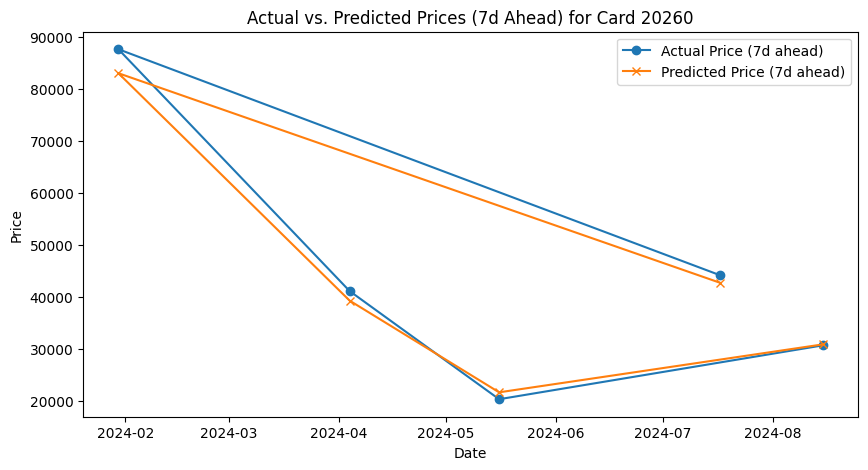

In [70]:
import matplotlib.pyplot as plt

# Filter a specific card for visualization
example_card_id = test['card_id'].iloc[800]  # Replace with a specific card_id if needed
example_card = test[test['card_id'] == example_card_id]

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 5))
plt.plot(example_card['date'], example_card['price_7d'], label='Actual Price (7d ahead)', marker='o')
plt.plot(example_card['date'], example_card['predicted_price_7d'], label='Predicted Price (7d ahead)', marker='x')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Actual vs. Predicted Prices (7d Ahead) for Card {example_card_id}')
plt.legend()
plt.show()

Top 20 Important Features:
                 Feature  Importance
16           price_day_1    0.946799
13        days_until_end    0.009849
12      days_since_start    0.009175
0                 rating    0.004988
14    days_since_release    0.002797
15  rolling_avg_price_7d    0.002531
5              passing_m    0.002129
4             shooting_m    0.001922
17           price_day_2    0.001846
9                 height    0.001588
7            defending_m    0.001479
11    total_ingame_stats    0.001422
8             physical_m    0.001353
18           price_day_3    0.001293
3                 pace_m    0.001274
1            skill_moves    0.000888
6            dribbling_m    0.000737
10                weight    0.000631
22           price_day_7    0.000613
23    price_change_day_1    0.000537


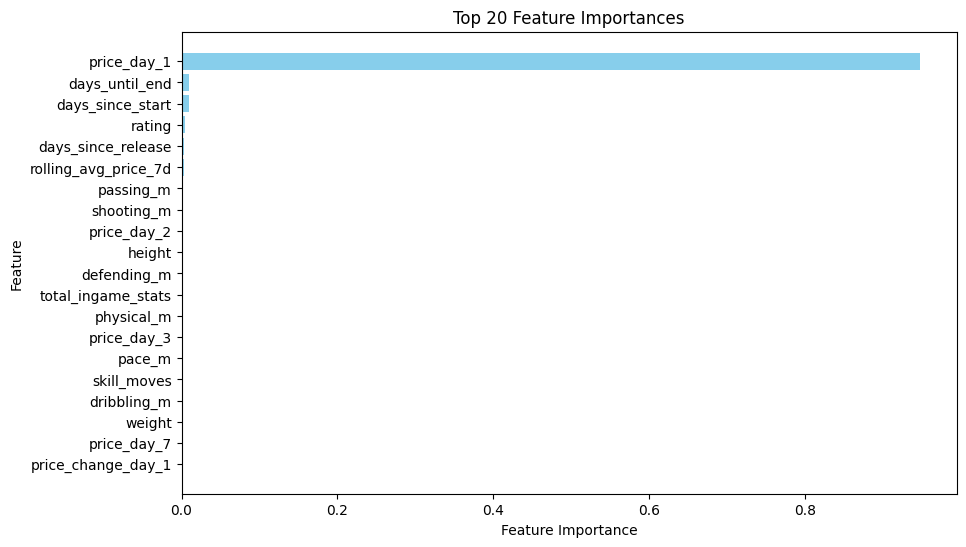

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate feature importance
feature_importance = pd.DataFrame({
    'Feature': predictor_features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 20 features
print("Top 20 Important Features:")
print(feature_importance.head(20))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(20), feature_importance['Importance'].head(20), color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [73]:
import random
from sklearn.model_selection import train_test_split

# Step 1: Extract unique card IDs
card_ids = attackers['card_id'].unique()

# Step 2: Split card IDs into train (80%) and test (20%)
train_val_card_ids, test_card_ids = train_test_split(card_ids, test_size=0.2, random_state=42)

# Step 3: Further split train_val_card_ids into train (80%) and validation (20%)
train_card_ids, val_card_ids = train_test_split(train_val_card_ids, test_size=0.2, random_state=42)

# Step 4: Create subsets based on card IDs
train = attackers[attackers['card_id'].isin(train_card_ids)]
val = attackers[attackers['card_id'].isin(val_card_ids)]
test = attackers[attackers['card_id'].isin(test_card_ids)]

# Verify split sizes
print(f"Train set size: {len(train)} rows")
print(f"Validation set size: {len(val)} rows")
print(f"Test set size: {len(test)} rows")


Train set size: 337271 rows
Validation set size: 79448 rows
Test set size: 109821 rows


In [74]:
# Define predictor features (excluding non-predictive columns like card_id, date)
predictor_features = [col for col in attackers.columns if col not in ['card_id', 'date', 'release_date', 'price_7d']]
target = 'price_7d'

print(f"Number of predictor features: {len(predictor_features)}")

Number of predictor features: 388


In [80]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=1000,       # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum depth of trees
    subsample=0.8,           # Fraction of samples used for training
    colsample_bytree=0.8,    # Fraction of features used per tree
    random_state=42
)

# Train the model with early stopping
xgb_model.fit(
    train[predictor_features], train[target],
    eval_set=[(val[predictor_features], val[target])],
    #early_stopping=10,  # Stops if validation error doesn't improve after 10 rounds
    verbose=True
)

[0]	validation_0-rmse:539034.27323
[1]	validation_0-rmse:486222.67527
[2]	validation_0-rmse:443367.18103
[3]	validation_0-rmse:405072.65759
[4]	validation_0-rmse:369888.93426
[5]	validation_0-rmse:338737.14264
[6]	validation_0-rmse:312118.54409
[7]	validation_0-rmse:287472.77467
[8]	validation_0-rmse:267584.21824
[9]	validation_0-rmse:250047.77692
[10]	validation_0-rmse:234494.94699
[11]	validation_0-rmse:222307.49489
[12]	validation_0-rmse:212969.98903
[13]	validation_0-rmse:203726.92802
[14]	validation_0-rmse:195548.63318
[15]	validation_0-rmse:187949.49015
[16]	validation_0-rmse:183370.07385
[17]	validation_0-rmse:178465.38511
[18]	validation_0-rmse:175303.60038
[19]	validation_0-rmse:173577.82536
[20]	validation_0-rmse:171292.79089
[21]	validation_0-rmse:168682.38454
[22]	validation_0-rmse:166307.01537
[23]	validation_0-rmse:164610.33430
[24]	validation_0-rmse:163439.18586
[25]	validation_0-rmse:163046.60697
[26]	validation_0-rmse:163833.15330
[27]	validation_0-rmse:163138.34512
[2

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [81]:
# Predict on the test set
test['predicted_price_7d'] = xgb_model.predict(test[predictor_features])

# Calculate evaluation metrics
mae = mean_absolute_error(test[target], test['predicted_price_7d'])
rmse = np.sqrt(mean_squared_error(test[target], test['predicted_price_7d']))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 16630.20131197856
Root Mean Square Error (RMSE): 86336.16052653169


/var/folders/zm/cz6m2z6n1jz8fgxw9vkjqjz40000gn/T/ipykernel_56710/2509248332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_price_7d'] = xgb_model.predict(test[predictor_features])


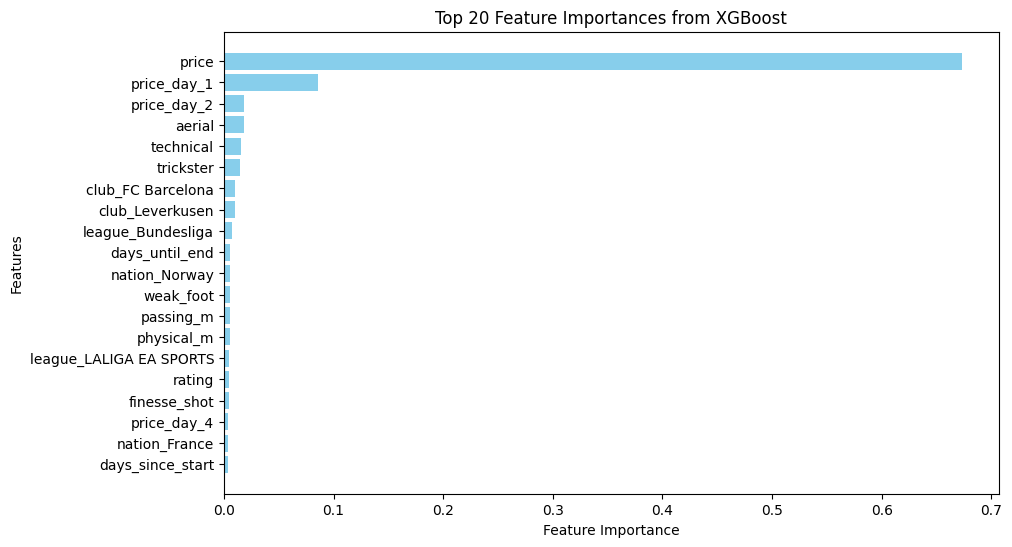

In [82]:
# Plot feature importance
import matplotlib.pyplot as plt

xgb_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': predictor_features,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(20), importance_df['Importance'].head(20), color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 20 Feature Importances from XGBoost")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Select a specific card from the test set
example_card_id = test['card_id'].iloc[10000]  # You can adjust the index for other cards
example_card = test[test['card_id'] == example_card_id]

# Compute error metrics for this specific card
mae = mean_absolute_error(example_card['price_7d'], example_card['predicted_price_7d'])
rmse = np.sqrt(mean_squared_error(example_card['price_7d'], example_card['predicted_price_7d']))

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(example_card['date'], example_card['price_7d'], label='Actual Price (7d ahead)', marker='o', color='blue')
plt.plot(example_card['date'], example_card['predicted_price_7d'], label='Predicted Price (7d ahead)', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Actual vs. Predicted Prices (7d Ahead) for Card {example_card_id}\nMAE: {mae:.2f}, RMSE: {rmse:.2f}')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'test' is not defined

In [88]:
# Display all column names
for idx, column in enumerate(attackers.columns):
    print(f"{idx}: {column}")

0: card_id
1: rating
2: skill_moves
3: weak_foot
4: pace_m
5: shooting_m
6: passing_m
7: dribbling_m
8: defending_m
9: physical_m
10: height
11: weight
12: total_ingame_stats
13: intl_rep
14: date
15: price
16: power_shot
17: dead_ball
18: finesse_shot
19: rapid
20: technical
21: trickster
22: trivela
23: aerial
24: quick_step
25: whipped_pass
26: days_since_start
27: days_until_end
28: days_since_release
29: release_date
30: is_new
31: rolling_avg_price_7d
32: price_day_1
33: price_day_2
34: price_day_3
35: price_day_4
36: price_day_5
37: price_day_6
38: price_day_7
39: price_change_day_1
40: price_change_day_2
41: price_change_day_3
42: price_change_day_4
43: price_change_day_5
44: price_change_day_6
45: price_change_day_7
46: price_7d
47: nation_Algeria
48: nation_Angola
49: nation_Argentina
50: nation_Armenia
51: nation_Australia
52: nation_Austria
53: nation_Belarus
54: nation_Belgium
55: nation_Bosnia and Herzegovina
56: nation_Brazil
57: nation_Bulgaria
58: nation_Cameroon
59: n

In [89]:
# Write the first 50,000 rows to a CSV file
file_path = "attackers_first_50000_rows.csv"  # Specify your desired file name and location
attackers.head(50000).to_csv(file_path, index=False)

print(f"First 50,000 rows written to {file_path}")

First 50,000 rows written to attackers_first_50000_rows.csv
